In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
patient_info_original = pd.read_csv('patient_info.csv', delimiter=',')
hospital_visit_original = pd.read_csv('date.csv', delimiter=',')

patient_info = pd.read_csv('patient_info.csv', delimiter=',')
hospital_visit = pd.read_csv('date.csv', delimiter=',')

In [94]:
patient_info_original

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2211,6009769,Male,48,Previous,39.3345,2
2212,6011693,Male,62,Previous,30.8813,2
2213,6015403,Female,60,Previous,34.7276,1
2214,6019982,Male,54,Never,25.3287,2


In [95]:
hospital_visit_original.size

5782

In [96]:
patient_info_original

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2211,6009769,Male,48,Previous,39.3345,2
2212,6011693,Male,62,Previous,30.8813,2
2213,6015403,Female,60,Previous,34.7276,1
2214,6019982,Male,54,Never,25.3287,2


In [97]:
patient_info_original.describe()

,Participant_ID,Age,BMI,Disease
count,2.216000e+03,2216.000000,2197.000000,2216.000000
mean,3.557200e+06,61.467058,29.083380,1.744585
std,1.426696e+06,6.689083,5.578879,0.436193
min,1.003300e+06,6.000000,-31.413300,1.000000
25%,2.338796e+06,58.000000,25.507800,1.000000
50%,3.591072e+06,63.000000,28.183200,2.000000
75%,4.774608e+06,67.000000,32.029400,2.000000
max,6.020094e+06,70.000000,100.357000,2.000000


In [98]:
hospital_visit_original.describe()

,Participant_ID
count,2.891000e+03
mean,3.571763e+06
std,1.429753e+06
min,1.003300e+06
25%,2.355413e+06
50%,3.597002e+06
75%,4.818746e+06
max,6.020094e+06


In [99]:
missing_bmi_records = patient_info_original[patient_info_original['BMI'].isna()]
missing_bmi_records

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
93,1257234,Male,69,Previous,NaN,1
263,1636077,Male,53,Previous,NaN,2
368,1904228,Female,53,Previous,NaN,2
802,2879103,Male,66,Previous,NaN,2
827,2935866,Male,61,Never,NaN,2
957,3238984,Male,60,Current,NaN,1
1000,3334466,Male,65,Previous,NaN,2
1051,3446745,Male,53,Previous,NaN,2
1054,3451474,Female,58,Previous,NaN,1
1059,3460152,Female,68,Previous,NaN,2


# DATA CLEAN #

# 1. Replace missing BMI values with the median BMI for the corresponding gender. #

In [100]:
patient_info['BMI'] = patient_info.groupby('Sex')['BMI'].transform(lambda x: x.fillna(x.median()))
print("BMI Male = ", patient_info[patient_info['Participant_ID'] == 1257234]['BMI'].values[0], ", BMI Female = ", patient_info[patient_info['Participant_ID'] == 1904228]['BMI'].values[0])

BMI Male =  28.2451 , BMI Female =  28.08285


# 2. Perform a sanity check on all columns in both files, and remove any samples that do not pass. #

In [101]:
def sanity_check_patient_info(df):
    df = df.drop_duplicates()
    df = df[df['Participant_ID'].apply(lambda x: isinstance(x, int) and len(str(x)) == 7)]
    df = df[df['Sex'].isin(['Male', 'Female'])]
    df = df[df['Age'].apply(lambda x: isinstance(x, int) and x >= 40)]
    df = df[df['BMI'].apply(lambda x: isinstance(x, (int, float)) and 15 <= x <= 60)]
    df = df[df['Smoking_status'].isin(['Never', 'Previous', 'Current', 'Prefer not to answer'])]
    df = df[df['Disease'].isin([1, 2])]
    return df

In [102]:
def sanity_check_hospital_visit(df):
    df = df.drop_duplicates()
    df = df[df["Participant_ID"].isin(patient_info["Participant_ID"])]
    df = df[df['Participant_ID'].apply(lambda x: isinstance(x, int) and len(str(x)) == 7)]
    df = df[df['VisitDate'].apply(lambda x: (isinstance(x, str) and len(x.split('/')) == 3 and x.split('/')[2].isdigit() and 1950 <= int(x.split('/')[2]) <= 2023))]
    df['VisitDate'] = pd.to_datetime(hospital_visit['VisitDate'], format='%d/%m/%Y')
    return df

In [103]:
startLength = len(patient_info)
patient_info = sanity_check_patient_info(patient_info)
newLength = startLength - len(patient_info)
falseRecords = len(patient_info_original) - len(patient_info)
print("Patient_Info: Deleted ", newLength, " Records. ", falseRecords, " less records than originally.")

Patient_Info: Deleted  6  Records.  6  less records than originally.


In [104]:
startLength = len(hospital_visit)
hospital_visit = sanity_check_hospital_visit(hospital_visit)
newLength = startLength - len(hospital_visit)
falseRecords = len(hospital_visit_original) - len(hospital_visit)
print("Hospital_Visit: Deleted ", newLength, " Records. ", falseRecords, " less records than originally.")

Hospital_Visit: Deleted  97  Records.  97  less records than originally.


# 3. Calculate the number of visits each patient made since 1/1/2020. If the VisitDate is missing, it indicates no visits during this period. #

In [105]:
visits_since_2020 = hospital_visit.groupby('Participant_ID')['VisitDate'].apply(lambda x: (x >= '01/01/2020').sum()).reset_index(name='Number_of_visits').fillna(0)
visits_since_2020

,Participant_ID,Number_of_visits
0,1003300,2
1,1004025,0
2,1005551,2
3,1005594,1
4,1005624,1
...,...,...
2121,6009769,0
2122,6011693,2
2123,6015403,0
2124,6019982,0


# 4. Create a summary table and/or chart showing the number of visits for each month (irrespective of the year). #

In [106]:
hospital_visit_filtered = hospital_visit[hospital_visit['VisitDate'] >= '01/01/2020']

monthly_summary = hospital_visit_filtered.groupby(hospital_visit_filtered['VisitDate'].dt.month).size().reset_index(name='Visits_since_2020').rename(columns={'VisitDate': 'Month'})
monthly_summary

,Month,Visits_since_2020
0,1,65
1,2,62
2,3,66
3,4,60
4,5,74
5,6,74
6,7,74
7,8,67
8,9,65
9,10,80


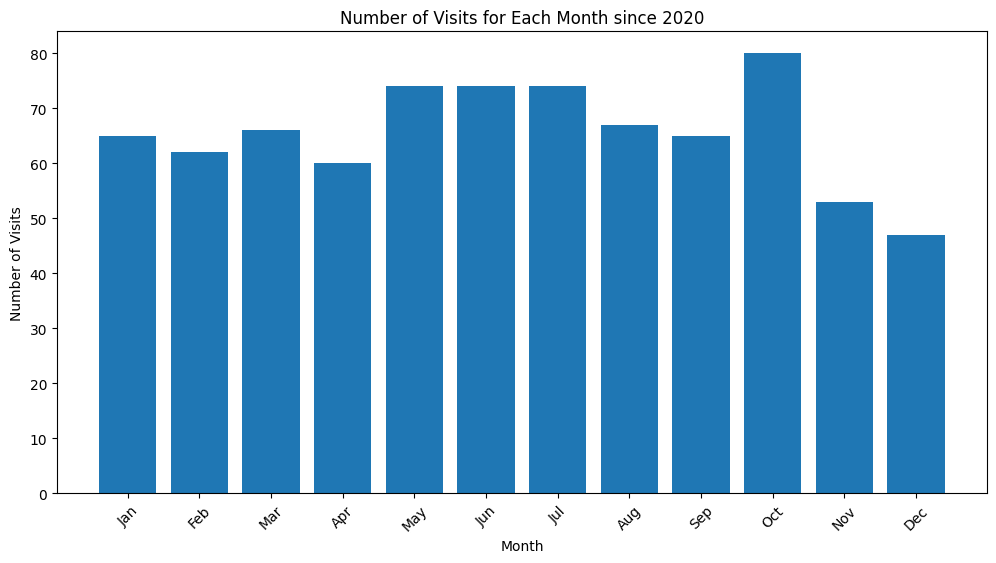

In [107]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_summary['Month'], monthly_summary['Visits_since_2020'])
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.title('Number of Visits for Each Month since 2020')
plt.xticks(ticks=monthly_summary['Month'], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 5. add a new column "age group " to split the age to 5 categories:  40-49, 50-59, 60-69, and above 70. # 

In [108]:
patient_info['age group'] = pd.cut(patient_info['Age'], bins=[40, 50, 60, 70, float('inf')], labels=['40-49', '50-59', '60-69', 'Above 70'], right=False)
patient_info

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease,age group
0,1003300,Male,62,Previous,33.7597,2,60-69
1,1004025,Male,60,Previous,28.1173,1,60-69
2,1005551,Male,69,Previous,26.4159,2,60-69
3,1005594,Male,64,Previous,24.7550,1,60-69
4,1005624,Male,64,Previous,35.0773,2,60-69
...,...,...,...,...,...,...,...
2211,6009769,Male,48,Previous,39.3345,2,40-49
2212,6011693,Male,62,Previous,30.8813,2,60-69
2213,6015403,Female,60,Previous,34.7276,1,60-69
2214,6019982,Male,54,Never,25.3287,2,50-59


# 6. Merge the two files to include the columns: Patient_ID, Sex, Age, BMI, Smoking_status, Number_of_visits, Disease and age group. #

In [109]:
patient_info = pd.merge(patient_info, visits_since_2020, on='Participant_ID', how='left')
patient_info = patient_info.rename(columns={'Participant_ID': 'Patient_ID'})
patient_info['Number_of_visits'] = patient_info['Number_of_visits'].fillna(0)
patient_info

,Patient_ID,Sex,Age,Smoking_status,BMI,Disease,age group,Number_of_visits
0,1003300,Male,62,Previous,33.7597,2,60-69,2.0
1,1004025,Male,60,Previous,28.1173,1,60-69,0.0
2,1005551,Male,69,Previous,26.4159,2,60-69,2.0
3,1005594,Male,64,Previous,24.7550,1,60-69,1.0
4,1005624,Male,64,Previous,35.0773,2,60-69,1.0
...,...,...,...,...,...,...,...,...
2205,6009769,Male,48,Previous,39.3345,2,40-49,0.0
2206,6011693,Male,62,Previous,30.8813,2,60-69,2.0
2207,6015403,Female,60,Previous,34.7276,1,60-69,0.0
2208,6019982,Male,54,Never,25.3287,2,50-59,0.0


# STATISTICS #

# 1. Compare the BMI between the healthy and control groups using a box or violin plot. #

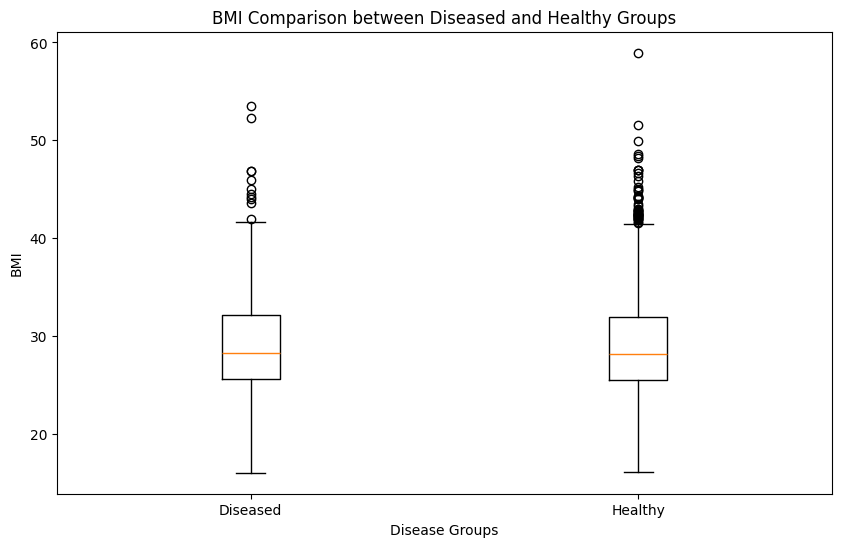

In [110]:
diseased_bmi = patient_info[patient_info['Disease'] == 1]['BMI']
healthy_bmi = patient_info[patient_info['Disease'] == 2]['BMI']

plt.figure(figsize=(10, 6))
plt.boxplot([diseased_bmi, healthy_bmi], tick_labels=['Diseased', 'Healthy'])
plt.xlabel('Disease Groups')
plt.ylabel('BMI')
plt.title('BMI Comparison between Diseased and Healthy Groups')
plt.show()

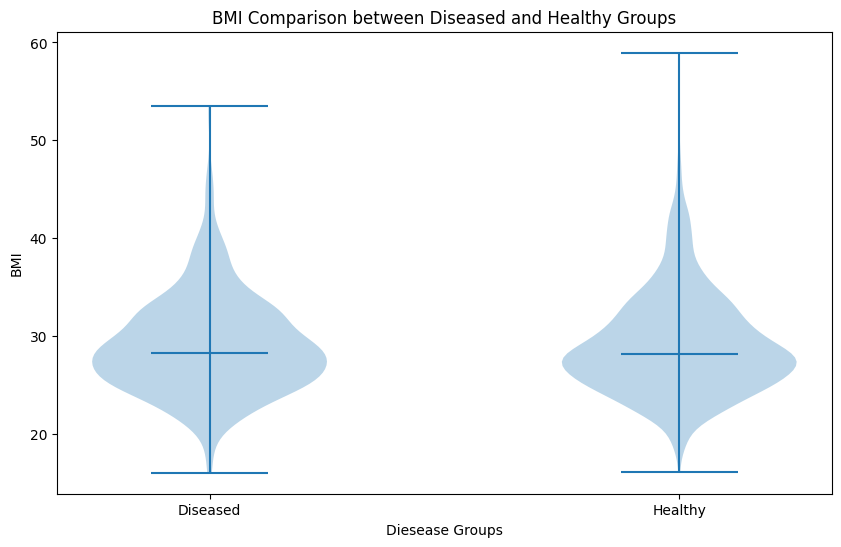

In [111]:
diseased_bmi = patient_info[patient_info['Disease'] == 1]['BMI']
healthy_bmi = patient_info[patient_info['Disease'] == 2]['BMI']

plt.figure(figsize=(10, 6))
plt.violinplot([diseased_bmi, healthy_bmi], showmeans=False, showmedians=True)
plt.xticks([1, 2], ['Diseased', 'Healthy'])
plt.xlabel('Diesease Groups')
plt.ylabel('BMI')
plt.title('BMI Comparison between Diseased and Healthy Groups')
plt.show()

In [112]:
print("BMI median for diseased people (", diseased_bmi.size, ") = ", diseased_bmi.mean(), ", BMI median for healthy people (", healthy_bmi.size, ") = ", healthy_bmi.mean())

BMI median for diseased people ( 565 ) =  29.035103982300882 , BMI median for healthy people ( 1645 ) =  29.07956893617021


### --> Because there are more healthy people than diseased, the amount of outliers is higher for the healthy group. Generally the bmi is statistically a little bit higher for diseased people. ### 

# 2. Examine if the proportion of smoking status differs between the healthy and control groups. #

In [113]:
smoking_status_proportions = patient_info.groupby(['Disease', 'Smoking_status']).size().unstack()
smoking_status_proportions = smoking_status_proportions.div(smoking_status_proportions.sum(axis=1), axis=0)
smoking_status_proportions

Smoking_status,Current,Never,Prefer not to answer,Previous
Disease,,,,
1,0.162832,0.378761,0.008850,0.449558
2,0.156839,0.386018,0.002432,0.454711


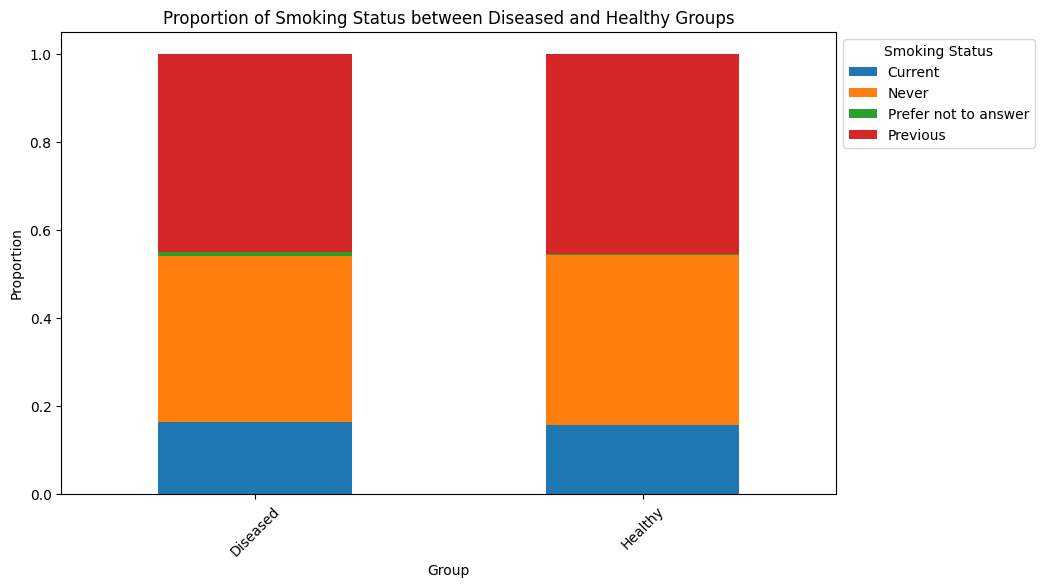

In [114]:
smoking_status_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Group')
plt.ylabel('Proportion')
plt.title('Proportion of Smoking Status between Diseased and Healthy Groups')
plt.xticks([0, 1], ['Diseased', 'Healthy'], rotation = 45)
plt.legend(title='Smoking Status', bbox_to_anchor=(1, 1))
plt.show()

### --> Overall there doesnt appear to be a direct connection between the smoking status and the disease, as the proportions are relatively evenly distributed between the 2 groups. ### 

# 3. Analyze the relationship between smoking status and the number of hospital visits, separately for the disease and healthy groups, and for the overall population. #

In [115]:
visits_by_smoking_disease = patient_info.groupby(['Disease', 'Smoking_status'])['Number_of_visits'].mean().unstack()

overall_visits_by_smoking = patient_info.groupby('Smoking_status')['Number_of_visits'].mean()

visits_by_smoking_disease.loc['Overall'] = overall_visits_by_smoking

visits_by_smoking_disease

Smoking_status,Current,Never,Prefer not to answer,Previous
Disease,,,,
1,0.315217,0.415888,0.200000,0.322835
2,0.341085,0.354331,0.250000,0.363636
Overall,0.334286,0.369847,0.222222,0.353293


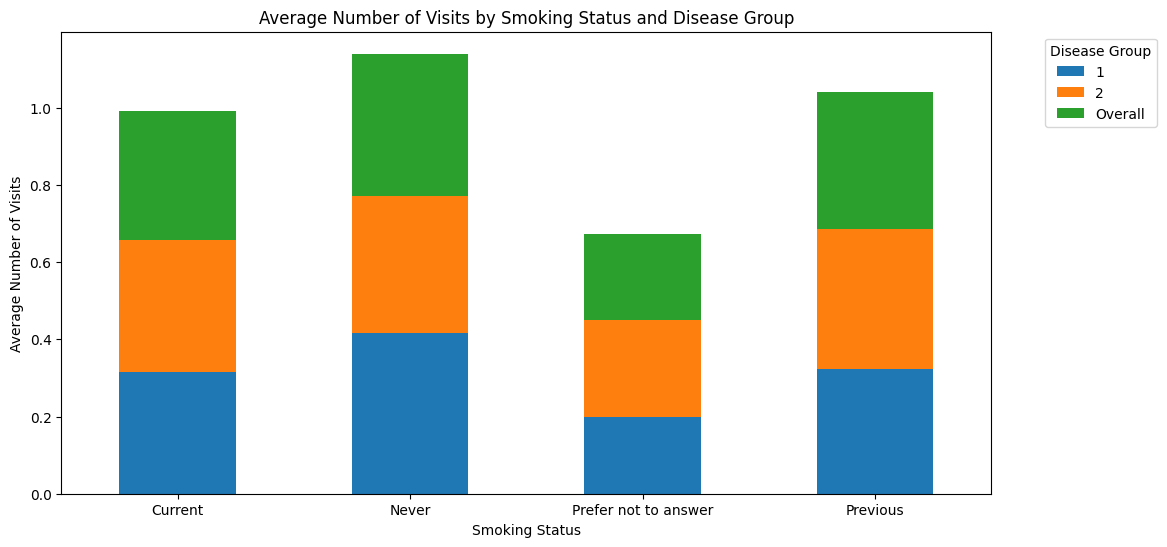

In [117]:
visits_by_smoking_disease.T.plot(kind='bar', stacked=True, figsize=(12, 6))

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel('Smoking Status')
plt.ylabel('Average Number of Visits')
plt.title('Average Number of Visits by Smoking Status and Disease Group')
plt.legend(title='Disease Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Anzeigen des Diagramms
plt.show()

### --> Across all groups the people who doesnt want to tell if they are smoking are visiting the hospital the least often. People who never smoked are visiting the hospital more often. Previous smokers and current smokers are relatively equal. ###

# 4. Determine if the number of visits is higher in the disease group compared to the healthy group. #

In [ ]:
total_visits_comparison = patient_info.groupby('Disease')['Number_of_visits'].sum().reset_index(name='Sum of hospital visits')
total_visits_comparison

,Disease,Sum of hospital visits
0,1,201.0
1,2,586.0


In [ ]:
total_visits_comparison = patient_info.groupby('Disease')['Patient_ID'].count().reset_index(name='Sum of hospital visits')
total_visits_comparison

,Disease,Sum of hospital visits
0,1,565
1,2,1645


In [ ]:
mean_visits_comparison = patient_info.groupby('Disease')['Number_of_visits'].mean().reset_index(name='Average visits per patient')
mean_visits_comparison

,Disease,Average visits per patient
0,1,0.355752
1,2,0.356231


### --> In average, slightly more healthy people visited the hospital. But generally there is no striking correlation. ###

# 5. Calculate the disease prevalence (number of sick  / total number population) across different age groups  in our dataset, and test if the prevalence is different across the group. #

In [ ]:
disease_counts = patient_info[patient_info['Disease'] == 1].groupby('age group', observed=True).size()
total_counts = patient_info.groupby('age group', observed=True).size()

prevalence = disease_counts / total_counts

prevalence_df = prevalence.reset_index()
prevalence_df.columns = ['Age Group', 'Prevalence']

prevalence_df

,Age Group,Prevalence
0,40-49,0.270968
1,50-59,0.217304
2,60-69,0.267236
3,Above 70,0.228571


### --> Slightly more people at the age of 40-49 are sick. Followed by people at the age of 60-69. People at age 50-59 are the least sick. ###